Import the necessary moduals

In [44]:
import pandas as pd

Read the data into a dataframe


In [57]:
df = pd.read_csv("../data/pump_data_updated.csv")
df.head()

,Index,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,0.00000,2020/04/07,08:39:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CLOSED_LOOP_MICRO_BOLUS,NaN,NaN,NaN,NaN,NaN
1,1.00000,2020/04/07,08:34:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PERMANENT,NaN,NaN,NaN,NaN
2,2.00000,2020/04/07,08:34:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CLOSED_LOOP_MICRO_BOLUS,NaN,NaN,NaN,NaN,NaN
3,3.00000,2020/04/07,08:33:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,DEVICE_ERROR,NaN,NaN,NaN
4,4.00000,2020/04/07,08:32:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CLOSED_LOOP_BG_CORRECTION,NaN,NaN,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 47 columns):
Index                                  5216 non-null object
Date                                   5216 non-null object
Time                                   5216 non-null object
New Device Time                        3 non-null object
BG Reading (mg/dL)                     178 non-null object
Linked BG Meter ID                     1 non-null object
Basal Rate (U/h)                       120 non-null object
Temp Basal Amount                      1 non-null object
Temp Basal Type                        1 non-null object
Temp Basal Duration (h:mm:ss)          1 non-null object
Bolus Type                             1961 non-null object
Bolus Volume Selected (U)              1947 non-null object
Bolus Volume Delivered (U)             1865 non-null object
Bolus Duration (h:mm:ss)               1 non-null object
Prime Type                             15 non-null object
Prime Volume De

In [59]:
df = df.loc[:,['Date','Time','BG Reading (mg/dL)']]
df.head()

,Date,Time,BG Reading (mg/dL)
0,2020/04/07,08:39:32,NaN
1,2020/04/07,08:34:55,NaN
2,2020/04/07,08:34:24,NaN
3,2020/04/07,08:33:15,NaN
4,2020/04/07,08:32:26,NaN


In [60]:
df[df['Date']=='MiniMed 670G MMT-1780']

,Date,Time,BG Reading (mg/dL)
2677,MiniMed 670G MMT-1780,Sensor,-------


In [61]:
df = df.drop(2677)
df = df.drop(2678)

In [62]:
df = df[df['BG Reading (mg/dL)'].isnull() == False]

In [63]:
df['date_time'] = df[['Date', 'Time']].agg(' '.join, axis=1)
df.head()

,Date,Time,BG Reading (mg/dL),date_time
8,2020/04/07,08:32:13,205.00,2020/04/07 08:32:13
9,2020/04/07,08:32:09,205.00,2020/04/07 08:32:09
11,2020/04/07,08:32:04,205.00,2020/04/07 08:32:04
14,2020/04/07,08:28:17,133.00,2020/04/07 08:28:17
18,2020/04/07,08:25:04,133.00,2020/04/07 08:25:04


In [71]:
#df = df.drop(['Date'], axis=1)
df = df.drop(['Time'], axis=1)

In [72]:
df.head()

,BG Reading (mg/dL),date_time
8,205.00,2020/04/07 08:32:13
9,205.00,2020/04/07 08:32:09
11,205.00,2020/04/07 08:32:04
14,133.00,2020/04/07 08:28:17
18,133.00,2020/04/07 08:25:04


In [75]:
# Convert Date to a datetime column
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y/%m/%d %H:%M:%S.%f')
df.head()

,BG Reading (mg/dL),date_time
8,205.00,2020-04-07 08:32:13
9,205.00,2020-04-07 08:32:09
11,205.00,2020-04-07 08:32:04
14,133.00,2020-04-07 08:28:17
18,133.00,2020-04-07 08:25:04


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 8 to 2625
Data columns (total 2 columns):
BG Reading (mg/dL)    176 non-null object
date_time             176 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [77]:
df.set_index('date_time', inplace=True)
df.head()

,BG Reading (mg/dL)
date_time,
2020-04-07 08:32:13,205.00
2020-04-07 08:32:09,205.00
2020-04-07 08:32:04,205.00
2020-04-07 08:28:17,133.00
2020-04-07 08:25:04,133.00


In [80]:
df['BG Reading (mg/dL)'] = df['BG Reading (mg/dL)'].astype(float)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 2020-04-07 08:32:13 to 2020-03-24 04:08:57
Data columns (total 1 columns):
BG Reading (mg/dL)    176 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB


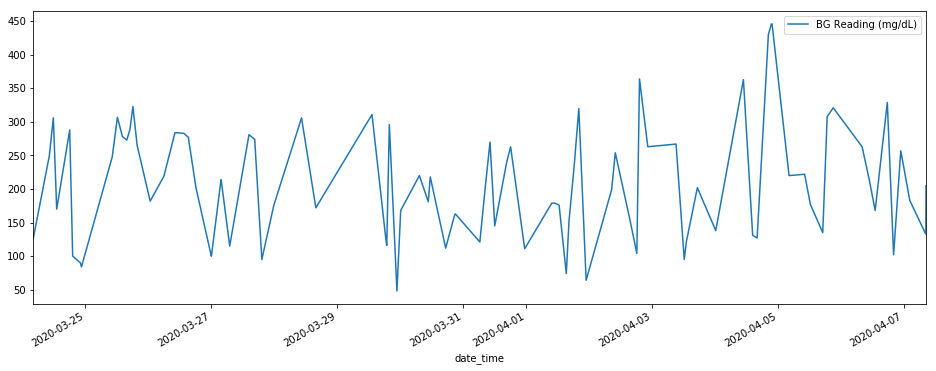

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(figsize = (16,6));